In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 

In [22]:
def formata_sequencia(sequencia):  
    sequencia = sequencia.upper()
      
    if sequencia[0] == ">":
        sequencia = sequencia.splitlines()
        sequencia = sequencia[1:]
        sequencia = "".join(sequencia)
    
    else:
        sequencia = sequencia.splitlines()
        sequencia = "".join(sequencia)
    
    return sequencia

In [23]:
def eh_dna(sequencia):
    if set(sequencia).issubset({"A", "C", "G", "T"}):
        return True
    else:
        return False

In [24]:
def conta_nucleotideos(sequencia, selecao):    
 
    total = len(sequencia)

    adenina = sequencia.count("A")
    citosina = sequencia.count("C")
    guanina = sequencia.count("G")
    timina = sequencia.count("T")
    total = len(sequencia)

    porc_adenina = (adenina / total) * 100
    porc_citosina = (citosina / total) * 100
    porc_guanina = (guanina / total) * 100
    porc_timina = (timina / total) * 100
    porc_total = porc_adenina + porc_citosina + porc_guanina + porc_timina

    df = pd.DataFrame({"Quantidade": [adenina, citosina, guanina, timina, total],
                        "Porcentagem (%)": [porc_adenina, porc_citosina, porc_guanina, porc_timina, porc_total]},
                        index=["Adenina", "Citosina", "Guanina", "Timina", "Total"])

    fig, ax = plt.subplots(figsize=(6,3))
    ax = sns.barplot(x=df.index[:4], y=selecao, data=df.iloc[:4])
    ax.set_title(f"{selecao} de nucleotídeos", fontweight="bold", fontsize=14)
    ax.set_ylabel(f"{selecao}", fontsize=12)
    if selecao == "Porcentagem (%)":
        ax.set_ylim(0, 100)
  
    return df, fig


In [25]:
def conteudo_gc(sequencia):

    gc = sequencia.count("G") + sequencia.count("C")
    porcentagem_gc = (gc / len(sequencia)) * 100
    porcentagem_at = 100 - porcentagem_gc
     
    df = pd.DataFrame({"Porcentagem (%)": [porcentagem_gc, porcentagem_at]},
                        index=["GC", "AT"])
    
    fig, ax = plt.subplots(figsize=(6,3))
    ax = sns.barplot(x=df.index, y="Porcentagem (%)", data=df)
    ax.set_title(f"Conteúdo GC", fontweight="bold", fontsize=14)
    ax.set_ylabel("Porcentagem (%)", fontsize=12)
    ax.set_ylim(0, 100)
    
    return df, fig

In [26]:
sequencia = """>Meu_DNA
GAACACGTGGAGGCAAACAGGAAGGTGAAGAAGAACTTATCCTATCAGGACGGAAGGTGCTCGG
ATCTTCCTCGCGACTCTAAATTGCCCCCTCTGAGGTCAAGGAACACAAGATGGTTTTGGAAATG
TGAACCCATTATAACATAAACCAGCATCGTGCCTGAAGCCATGCCTGCTGCCACCATGCCAGTCC"""

In [27]:
sequencia_formatada = formata_sequencia(sequencia)

In [28]:
if eh_dna(sequencia_formatada):
    print("É dna")
else:
    print("Não é dna")

É dna


(          Quantidade  Porcentagem (%)
 Adenina           57        29.533679
 Citosina          50        25.906736
 Guanina           47        24.352332
 Timina            39        20.207254
 Total            193       100.000000,
 <Figure size 432x216 with 1 Axes>)

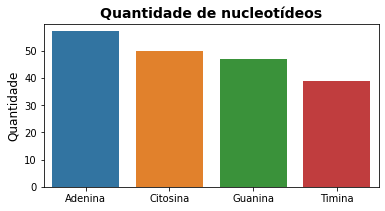

In [29]:
conta_nucleotideos(sequencia_formatada, "Quantidade")

(    Porcentagem (%)
 GC        50.259067
 AT        49.740933,
 <Figure size 432x216 with 1 Axes>)

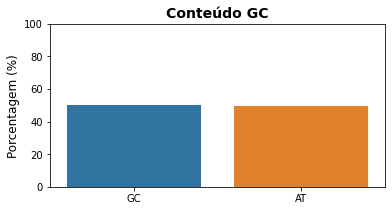

In [31]:
conteudo_gc(sequencia_formatada)